STEP 1: Import libraries

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

STEP 2: Load Dataset

In [79]:
df = pd.read_csv("insurance.csv")

STEP 3: Show dataset

In [80]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


STEP 4: Data preprocessing

In [82]:
df_encoded = pd.get_dummies(df, drop_first = True)
df_encoded.head() 

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


STEP 5: Target variable

In [83]:
y = df_encoded["charges"]
x = df_encoded.drop("charges", axis = 1)

STEP 6: Train - Test - Split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [85]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)

x_train: (1070, 8)
y_train: (1070,)


STEP 7: Train - Linear regression model

In [86]:
model = LinearRegression()

STEP 8: Fit model

In [87]:
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


STEP 9: Evaluate the model

Prediction

In [88]:
Prediction = model.predict(x_test)


Mean_Absolute_Error

In [96]:
mae = mean_absolute_error(y_test, Prediction)
print("mean_absolute_error:",mae)

mean_absolute_error: 4181.19447375365


Root_mean_square_error

In [94]:
rmse = np.sqrt(mean_squared_error(y_test,Prediction))
print("RMSE:",rmse)

RMSE: 5796.284659276273


STEP 10: Visualizing impact of Insurance Charges

AGE VS CHARGES

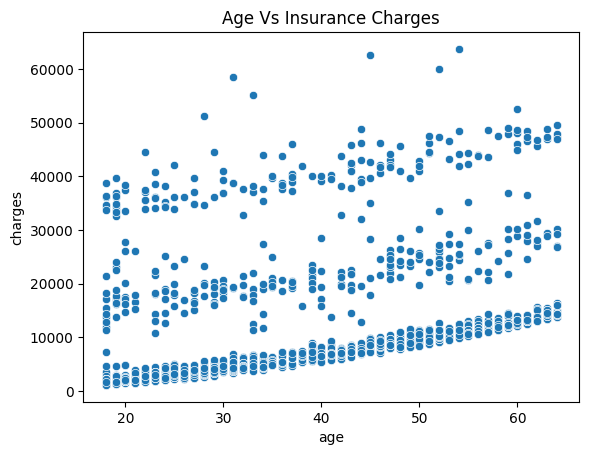

In [100]:
plt.Figure()
sns.scatterplot(x="age",y="charges",data=df)
plt.title("Age Vs Insurance Charges")
plt.show()

BMI VS CHARGES

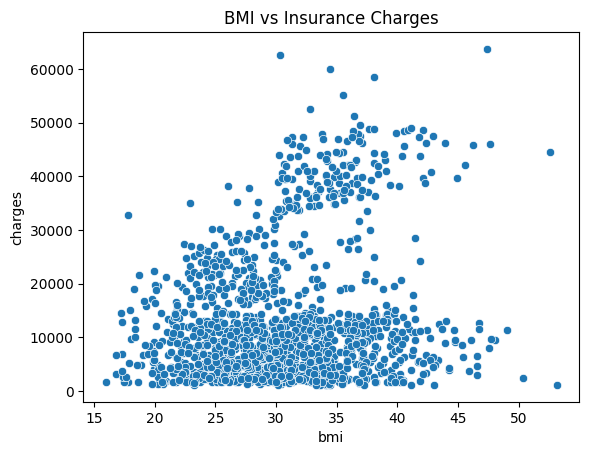

In [101]:
plt.Figure()
sns.scatterplot(x="bmi",y="charges",data=df)
plt.title("BMI vs Insurance Charges")
plt.show()

SMOKING VS CHARGES

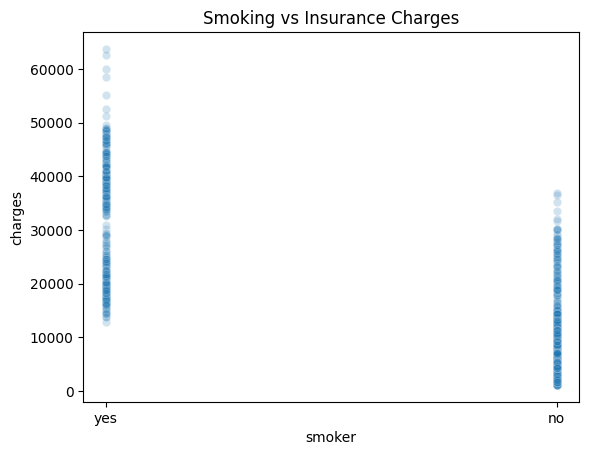

In [108]:
plt.Figure()
sns.scatterplot(x="smoker",y="charges",data=df,alpha=0.2)
plt.title("Smoking vs Insurance Charges")
plt.show()

In [109]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354
